**1. Import dataset**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd

df = pd.read_parquet('/content/drive/My Drive/Project/data/data_final.parquet')

print(df.head(5))

                                               title  \
0  Is Physics Sick? [In Praise of Classical Physics]   
1    Modern Mathematical Physics: what it should be?   
2                                Topology in Physics   
3       Contents of Physics Related E-Print Archives   
4        Fundamental Dilemmas in Theoretical Physics   

                                             authors  \
0                                     Hisham Ghassib   
1                                     Ludwig Faddeev   
2                                          R. Jackiw   
3  E. R. Prakasan, Anil Kumar, Anil Sagar, Lalit ...   
4                                     Hisham Ghassib   

                                             summary             published  \
0  In this paper, it is argued that theoretical p...  2012-09-04T10:32:56Z   
1  Personal view of author on goals and content o...  2000-02-08T13:13:00Z   
2  The phenomenon of quantum number fractionaliza...  2005-03-15T16:00:59Z   
3  The frontie

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150171 entries, 0 to 150170
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   title       150171 non-null  object
 1   authors     150171 non-null  object
 2   summary     150171 non-null  object
 3   published   150171 non-null  object
 4   updated     150171 non-null  object
 5   link        150171 non-null  object
 6   pdf_url     150171 non-null  object
 7   categories  150171 non-null  object
 8   target      150171 non-null  object
dtypes: object(9)
memory usage: 10.3+ MB


**2. Number of papers per year**

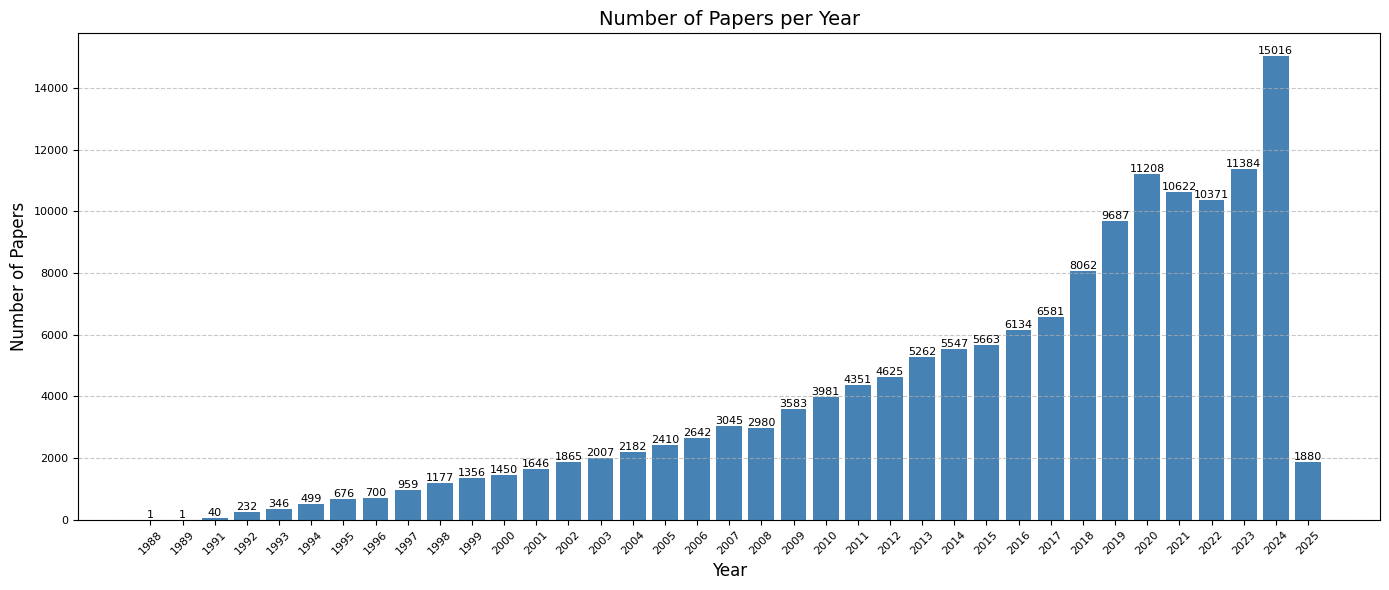

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df has the 'updated' column
df["year"] = df["updated"].str[:4]
year_counts = df["year"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))  # Increase or decrease figure size as needed

# Increase the bar width by adjusting the 'width' parameter
bars = ax.bar(year_counts.index, year_counts.values, color='steelblue', width=0.8)

# Annotate each bar with its count value
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height,
            f"{int(height)}",
            ha='center', va='bottom',
            fontsize=8)  # Smaller font size for annotations

# Reduce font sizes on axes and title
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Number of Papers", fontsize=12)
ax.set_title("Number of Papers per Year", fontsize=14)

# Adjust tick parameters for smaller labels
ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# Optional grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**3. Number of categories per paper**

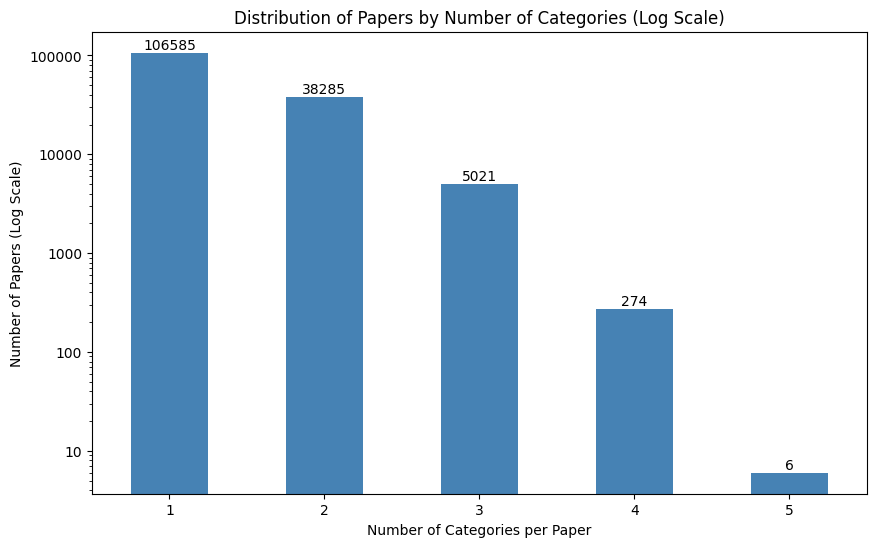

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter

# Assuming you already have 'df' DataFrame with the 'num_categories' column
df['num_categories'] = df['target'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Get the frequency distribution of the number of categories
cat_counts = df['num_categories'].value_counts().sort_index()

# Visualize using a bar plot with adjustments
plt.figure(figsize=(10, 6))

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Create the bar plot
ax = cat_counts.plot(kind='bar', color='steelblue')  # Optional: set a color

# Add text labels on top of the bars
for i, v in enumerate(cat_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)

# Update labels and title
plt.xlabel('Number of Categories per Paper')
plt.ylabel('Number of Papers (Log Scale)')  # Update label to reflect log scale
plt.title('Distribution of Papers by Number of Categories (Log Scale)')
plt.xticks(rotation=0)

# Change y-axis to show normal numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

plt.show()


**4. Word Cloud**

4.1. Preprocessing data

In [14]:
import re
import string
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

# Custom stopword list
custom_stopwords = ["show", "based", "present", "use", "propose", "using", "paper", "Moveover", "need", "within", "example",
                    "one", "study", "well", "result", "provide", "proposed", "appoarch", "given", "describe", "demonstrate",
                    "find", "also", "problem", "results", "introduce", "state", "particular", "used", "However", "shown", "approach",
                    "give", "term", "may", "discuss", "review", "present", "consider", "discuss", "model", "system"]

# Download necessary NLTK data (run once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the tokenizer, lemmatizer, stemmer
wpt = WordPunctTokenizer()

# Create a stopwords set that combines NLTK's stopwords and the custom stopwords
stop_words = set(stopwords.words('english')).union(custom_stopwords)

def normalized_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ', text)
    text = re.sub(r'<.*?>+', ' ', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\w*\d\w*', ' ', text)
    tokens = wpt.tokenize(text)

    filtered_tokens = [token for token in tokens if token not in stop_words]

    cleaned_text = ' '.join(filtered_tokens)
    return cleaned_text

# Preprocess summary column
df['cleaned'] = df['summary'].apply(lambda x: normalized_text(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
df.head(5)

,title,authors,summary,published,updated,link,pdf_url,categories,target,year,num_categories,cleaned
0,Is Physics Sick? [In Praise of Classical Physics],Hisham Ghassib,"In this paper, it is argued that theoretical p...",2012-09-04T10:32:56Z,2012-09-04T10:32:56Z,http://arxiv.org/abs/1209.0592v1,http://arxiv.org/pdf/1209.0592v1,"physics.gen-ph, physics.hist-ph",physic,2012,1,argued theoretical physics akin organism rigid...
1,Modern Mathematical Physics: what it should be?,Ludwig Faddeev,Personal view of author on goals and content o...,2000-02-08T13:13:00Z,2000-02-10T10:14:56Z,http://arxiv.org/abs/math-ph/0002018v2,http://arxiv.org/pdf/math-ph/0002018v2,"math-ph, hep-th, math.MP","math-stats,physic",2000,2,personal view author goals content mathematica...
2,Topology in Physics,R. Jackiw,The phenomenon of quantum number fractionaliza...,2005-03-15T16:00:59Z,2005-03-15T16:00:59Z,http://arxiv.org/abs/math-ph/0503039v1,http://arxiv.org/pdf/math-ph/0503039v1,"math-ph, cond-mat.mes-hall, math.MP, physics.c...","math-stats,physic",2005,2,phenomenon quantum number fractionalization ex...
3,Contents of Physics Related E-Print Archives,"E. R. Prakasan, Anil Kumar, Anil Sagar, Lalit ...",The frontiers of physics related e-print archi...,2003-08-28T13:12:57Z,2003-08-28T13:12:57Z,http://arxiv.org/abs/physics/0308107v1,http://arxiv.org/pdf/physics/0308107v1,physics.data-an,physic,2003,1,frontiers physics related e print archives web...
4,Fundamental Dilemmas in Theoretical Physics,Hisham Ghassib,"In this paper, we argue that there are foundat...",2014-05-22T07:49:09Z,2014-05-22T07:49:09Z,http://arxiv.org/abs/1405.5530v1,http://arxiv.org/pdf/1405.5530v1,physics.hist-ph,physic,2014,1,argue foundational dilemmas theoretical physic...


4.2. Word Cloud

In [16]:
# Ensure 'published' is in datetime format
df['published'] = pd.to_datetime(df['published'].str.replace('Z', ''), errors='coerce')

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to generate word cloud based on date range
def generate_word_cloud(df, start_year=None, end_year=None):
    # Filter the dataframe based on the year range
    if start_year and end_year:
        df = df[(df['published'].dt.year >= start_year) & (df['published'].dt.year <= end_year)]
    elif start_year:
        df = df[df['published'].dt.year >= start_year]
    elif end_year:
        df = df[df['published'].dt.year <= end_year]

    # Combine all cleaned text from the 'cleaned' column into a single string
    cleaned_text = " ".join(df['cleaned'].dropna().tolist())  # Use 'cleaned' column for word cloud

    # Create a word cloud object
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          stopwords=None,  # Stopwords already removed in cleaning step
                          collocations=True).generate(cleaned_text)

    # Display the generated word cloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud of Preprocessed Text (Year: {start_year}-{end_year})", fontsize=20)
    plt.show()

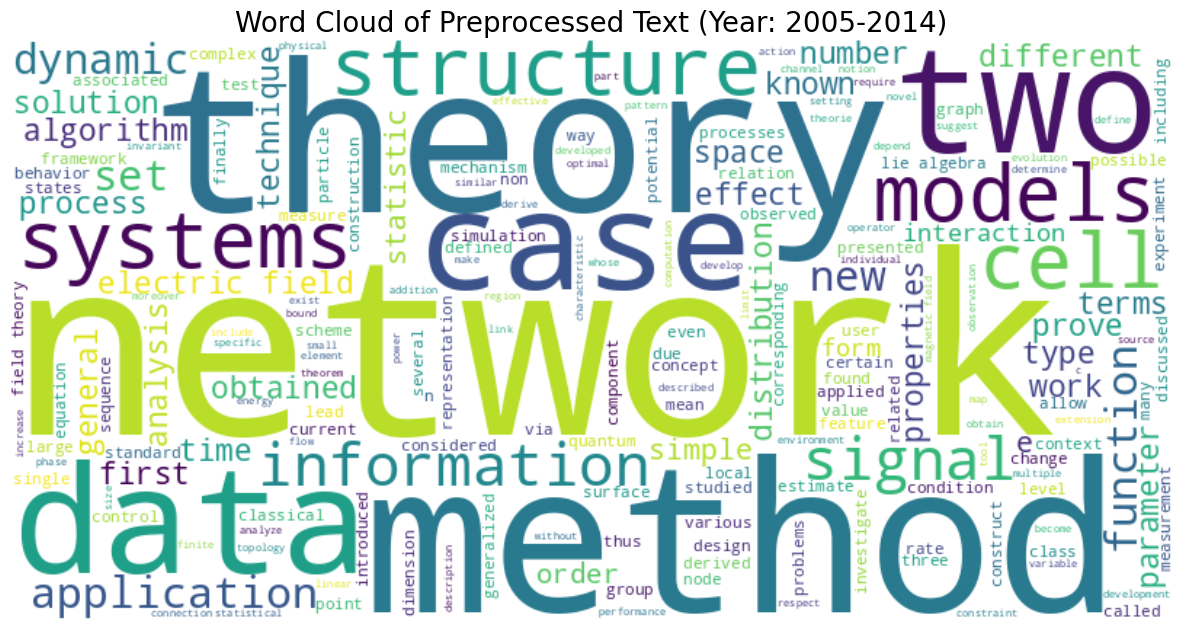

In [18]:
# Word cloud from 2005 to 2014
generate_word_cloud(df, start_year=2005, end_year=2014)

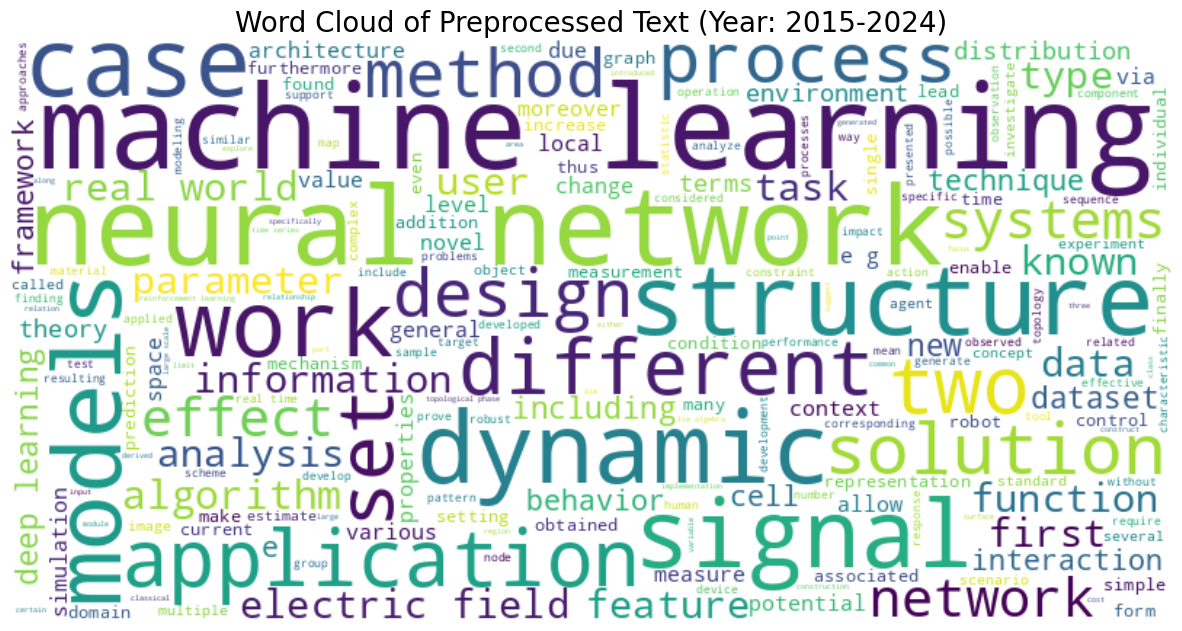

In [19]:
# Word cloud from 2015 to 2024
generate_word_cloud(df, start_year=2015, end_year=2024)